<a href="https://colab.research.google.com/github/raghavaraghav3/CS-5783/blob/main/Assignment3/Assignment_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
# Load the TensorBoard notebook extension.
%reload_ext tensorboard

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import tensorboard
import matplotlib.pyplot as plt

import numpy as np

from keras.datasets import mnist, cifar10

from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, Input
from keras.models import Sequential, Model

**Question 1**

In [ ]:
(X_Train, Y_Train), (X_Test, Y_Test) = keras.datasets.mnist.load_data() # Downloading the mnist data set

In [ ]:
print("X Train -", X_Train.shape, "Y Train -", Y_Train.shape, "X Test -", X_Test.shape, "Y Test -", Y_Test.shape)

X Train - (60000, 28, 28) Y Train - (60000,) X Test - (10000, 28, 28) Y Test - (10000,)


In [ ]:
X_Train = X_Train/255.0
X_Test = X_Test/255.0
X_Train = X_Train.reshape(-1, 28, 28, 1) #add an additional dimension to represent the single-channel
X_Test = X_Test.reshape(-1, 28, 28, 1) #add an additional dimension to represent the single-channel

**1.1**

In [ ]:
cnn_model = tf.keras.models.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(30, (3, 3), padding='same', activation='relu'))

cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(60, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))

cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(90, (3, 3), padding='same', activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(100, (3, 3), padding='same', activation='relu'))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(10, activation ='softmax'))

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.build(input_shape=(1,28,28,1))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (1, 28, 28, 10)           100       
                                                                 
 conv2d_11 (Conv2D)          (1, 28, 28, 20)           1820      
                                                                 
 conv2d_12 (Conv2D)          (1, 28, 28, 30)           5430      
                                                                 
 max_pooling2d_2 (MaxPooling  (1, 14, 14, 30)          0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (1, 14, 14, 40)           10840     
                                                                 
 conv2d_14 (Conv2D)          (1, 14, 14, 50)           18050     
                                                      

Train and Evaluation with test set

In [ ]:
model1 = cnn_model

# Train the model
model1.fit(X_Train, Y_Train)

# Train the model
score = model1.evaluate(X_Test, Y_Test)

#Results
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 13s 41ms/step - loss: 0.0516 - accuracy: 0.9831
Test loss: 0.051588188856840134
Test accuracy: 0.9830999970436096


In [ ]:
model1_1 = cnn_model

# Train the model
model1_1.fit(X_Train, Y_Train, batch_size=512, epochs=5)

# Train the model
score_1 = model1_1.evaluate(X_Test, Y_Test)

#Results
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Epoch 1/5
118/118 [==============================] - 428s 4s/step - loss: 0.2312 - accuracy: 0.9308
Epoch 2/5
118/118 [==============================] - 427s 4s/step - loss: 0.0566 - accuracy: 0.9822
Epoch 3/5
118/118 [==============================] - 430s 4s/step - loss: 0.0421 - accuracy: 0.9869
Epoch 4/5
118/118 [==============================] - 428s 4s/step - loss: 0.0316 - accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 22s 70ms/step - loss: 0.0268 - accuracy: 0.9915
Test loss: 0.026755444705486298
Test accuracy: 0.9915000200271606


**1.1 Explanation**
I have used 10 convolution layers between 10 and 100 layers, with the first as 10 and increasing upto 100. The results showed are above. With epoch =5 and batch size = 512, the model performed well with train accuracy = 98.31 and test accuracy to 99.15

**1.2**

In [ ]:
cnn_model2 = tf.keras.models.Sequential()

cnn_model2.add(tf.keras.layers.Conv2D(100, (3, 3), padding='same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(90, (3, 3), padding='same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(60, (3, 3), padding='same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(30, (3, 3), padding='same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))

cnn_model2.add(tf.keras.layers.Flatten())
cnn_model2.add(tf.keras.layers.Dense(10, activation ='softmax'))

cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model2.build(input_shape=(1,28,28,1))
cnn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (1, 28, 28, 100)          1000      
                                                                 
 conv2d_21 (Conv2D)          (1, 28, 28, 90)           81090     
                                                                 
 conv2d_22 (Conv2D)          (1, 28, 28, 80)           64880     
                                                                 
 max_pooling2d_4 (MaxPooling  (1, 14, 14, 80)          0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (1, 14, 14, 70)           50470     
                                                                 
 conv2d_24 (Conv2D)          (1, 14, 14, 60)           37860     
                                                      

In [ ]:
model2 = cnn_model2

# Train the model
model2.fit(X_Train, Y_Train)

# Train the model
score = model2.evaluate(X_Test, Y_Test)

#Results
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 42s 133ms/step - loss: 0.0843 - accuracy: 0.9724
Test loss: 0.08425775170326233
Test accuracy: 0.9724000096321106


In [ ]:
model2_1 = cnn_model

# Train the model
model2_1.fit(X_Train, Y_Train, batch_size=512, epochs=5)

# Train the model
score_2 = model2_1.evaluate(X_Test, Y_Test)

#Results
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Epoch 1/5
118/118 [==============================] - 439s 4s/step - loss: 0.0197 - accuracy: 0.9938
Epoch 2/5
118/118 [==============================] - 440s 4s/step - loss: 0.0159 - accuracy: 0.9949
Epoch 3/5
118/118 [==============================] - 432s 4s/step - loss: 0.0144 - accuracy: 0.9954
Epoch 4/5
118/118 [==============================] - 430s 4s/step - loss: 0.0125 - accuracy: 0.9961
Epoch 5/5
313/313 [==============================] - 23s 73ms/step - loss: 0.0227 - accuracy: 0.9920
Test loss: 0.022745436057448387
Test accuracy: 0.9919999837875366


**1.2 Explanation**
I have used 10 convolution layers between 10 and 100 layers, with the first as 100 and decreasing to 10. The results showed are above. With epoch =5 and batch size = 512, the model performed well with train accuracy = 99.20 and test accuracy to 99.19. This model is slightly better than the above method.

**1.3**

In [ ]:
cnn_model3 = tf.keras.models.Sequential()

cnn_model3.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(30, (3, 3), padding='same', activation='relu'))

cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(60, (3, 3), padding='same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))

cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(30, (3, 3), padding='same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))

cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(10, activation ='softmax'))

cnn_model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model3.build(input_shape=(1,28,28,1))
cnn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (1, 28, 28, 10)           100       
                                                                 
 conv2d_31 (Conv2D)          (1, 28, 28, 20)           1820      
                                                                 
 conv2d_32 (Conv2D)          (1, 28, 28, 30)           5430      
                                                                 
 max_pooling2d_6 (MaxPooling  (1, 14, 14, 30)          0         
 2D)                                                             
                                                                 
 conv2d_33 (Conv2D)          (1, 14, 14, 40)           10840     
                                                                 
 conv2d_34 (Conv2D)          (1, 14, 14, 50)           18050     
                                                      

In [ ]:
model3 = cnn_model3

# Train the model
model3.fit(X_Train, Y_Train)

# Train the model
score = model3.evaluate(X_Test, Y_Test)

# Results
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 19s 59ms/step - loss: 0.0567 - accuracy: 0.9829
Test loss: 0.05666235834360123
Test accuracy: 0.9829000234603882


In [ ]:
model3_1 = cnn_model

# Train the model
model3_1.fit(X_Train, Y_Train, batch_size=512, epochs=5)

# Train the model
score_3 = model3_1.evaluate(X_Test, Y_Test)

#Results
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Epoch 1/5
118/118 [==============================] - 437s 4s/step - loss: 0.0087 - accuracy: 0.9972
Epoch 2/5
118/118 [==============================] - 434s 4s/step - loss: 0.0076 - accuracy: 0.9974
Epoch 3/5
118/118 [==============================] - 430s 4s/step - loss: 0.0076 - accuracy: 0.9974
Epoch 4/5
118/118 [==============================] - 429s 4s/step - loss: 0.0083 - accuracy: 0.9973
Epoch 5/5
313/313 [==============================] - 22s 70ms/step - loss: 0.0303 - accuracy: 0.9920
Test loss: 0.022745436057448387
Test accuracy: 0.9919999837875366


**1 Explanation**
I have used 10 convolution layers same as before. I used between 10 and 60 layers, with the first senario increasing up until 60 and decreasing, till the end to 10 back again. I have used the same parameter as before and this is almost same 1.2

**Question 2**

In [19]:
(X_Train1, Y_Train1), (X_Test1, Y_Test1) = keras.datasets.cifar10.load_data() # Downloading the mnist data set
print(X_Train1.shape, " -- ", Y_Train1.shape, " -- ", X_Test1.shape," -- ", Y_Test1.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)  --  (50000, 1)  --  (10000, 32, 32, 3)  --  (10000, 1)


In [20]:
X_Train1 = X_Train1/255.0
X_Test1 = X_Test1/255.0

In [21]:
cifar10 = tf.keras.models.Sequential()
cifar10.add(tf.keras.layers.Conv2D(6, kernel_size = (5, 5), strides = (1, 1), input_shape = (32, 32, 3), activation='relu'))
cifar10.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cifar10.add(tf.keras.layers.Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'relu'))
cifar10.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cifar10.add(tf.keras.layers.Conv2D(120, kernel_size = (5, 5), activation = 'relu'))

cifar10.add(tf.keras.layers.Flatten())
cifar10.add(tf.keras.layers.Dense(84))
cifar10.add(tf.keras.layers.Dense(10, activation='softmax'))

cifar10.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_41 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_42 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)              

In [22]:
cifar10.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
accuracy= cifar10.fit(X_Train1, Y_Train1, epochs=25, batch_size=2000)

Epoch 1/25
25/25 [==============================] - 34s 1s/step - loss: 2.1626 - accuracy: 0.2206
Epoch 2/25
25/25 [==============================] - 34s 1s/step - loss: 1.8553 - accuracy: 0.3347
Epoch 3/25
25/25 [==============================] - 31s 1s/step - loss: 1.7104 - accuracy: 0.3858
Epoch 4/25
25/25 [==============================] - 31s 1s/step - loss: 1.6143 - accuracy: 0.4192
Epoch 5/25
25/25 [==============================] - 32s 1s/step - loss: 1.5547 - accuracy: 0.4404
Epoch 6/25
25/25 [==============================] - 31s 1s/step - loss: 1.5122 - accuracy: 0.4557
Epoch 7/25
25/25 [==============================] - 31s 1s/step - loss: 1.4732 - accuracy: 0.4683
Epoch 8/25
25/25 [==============================] - 32s 1s/step - loss: 1.4490 - accuracy: 0.4787
Epoch 9/25
25/25 [==============================] - 31s 1s/step - loss: 1.4221 - accuracy: 0.4897
Epoch 10/25
25/25 [==============================] - 30s 1s/step - loss: 1.4041 - accuracy: 0.4957
Epoch 11/25
25/25 [

In [23]:
model_score = cifar10.evaluate(X_Test1, Y_Test1)
print('Test loss:', model_score[0])
print('Test accuracy:', model_score[1])

313/313 [==============================] - 5s 15ms/step - loss: 1.2578 - accuracy: 0.5601
Test loss: 1.2577661275863647
Test accuracy: 0.5601000189781189


**2.1**

In [24]:
lst_lr = [0.0001, 0.001, 0.005, 0.01, 0.1]
loss_acc_lst = []
loss_lst = []
acc_lst = []

for lr in lst_lr:
    print("For LR = ", lr)
    model = tf.keras.models.clone_model(cifar10)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
    model.fit(X_Train1, Y_Train1, epochs=25)
    loss, acc = model.evaluate(X_Test1, Y_Test1)
    loss_acc_lst.append([loss, acc])
    loss_lst.append(loss)
    acc_lst.append(acc)
    print("\n")

For LR =  0.0001
Epoch 1/25
1563/1563 [==============================] - 51s 32ms/step - loss: 1.8709 - accuracy: 0.3242
Epoch 2/25
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5785 - accuracy: 0.4322
Epoch 3/25
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4845 - accuracy: 0.4678
Epoch 4/25
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4273 - accuracy: 0.4895
Epoch 5/25
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3848 - accuracy: 0.5063
Epoch 6/25
1563/1563 [==============================] - 49s 31ms/step - loss: 1.3509 - accuracy: 0.5206
Epoch 7/25
1563/1563 [==============================] - 51s 32ms/step - loss: 1.3235 - accuracy: 0.5290
Epoch 8/25
1563/1563 [==============================] - 49s 32ms/step - loss: 1.2970 - accuracy: 0.5372
Epoch 9/25
1563/1563 [==============================] - 51s 32ms/step - loss: 1.2753 - accuracy: 0.5472
Epoch 10/25
1563/1563 [========================

Learning rate vs Accuracy

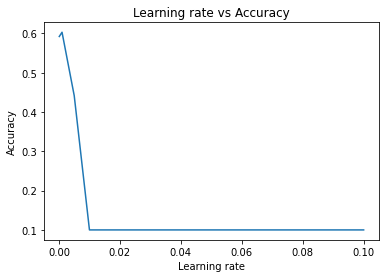

In [25]:
plt.plot(lst_lr,acc_lst)
plt.title("Learning rate vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

Learning rate vs Loss

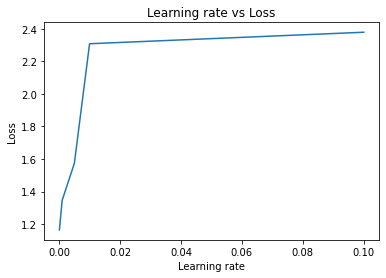

In [26]:
plt.plot(lst_lr,loss_lst)
plt.title("Learning rate vs Loss")
plt.ylabel("Loss")
plt.xlabel("Learning rate")
plt.show()

**2.1 Explanation**
With the increase in learning rate, the loss increases and the accuracy falls down

**2.2**

In [28]:
lst_batch_size = [500, 1000, 10000, 20000] # default LR of adam optimizer is 0.001
loss_acc_lst_batch = []
loss_lst_batch = []
acc_lst_batch = []

for batch_size in lst_batch_size:
    print("For LBatch = ", batch_size)
    new_model = tf.keras.models.clone_model(cifar10)
    new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    new_model.fit(X_Train1, Y_Train1, epochs=25, batch_size=batch_size)
    loss1, acc1 = new_model.evaluate(X_Test1, Y_Test1)
    loss_acc_lst_batch.append([loss1, acc1])
    loss_lst_batch.append(loss1)
    acc_lst_batch.append(acc1)
    print("\n")

For LBatch =  500
Epoch 1/25
100/100 [==============================] - 37s 365ms/step - loss: 1.9217 - accuracy: 0.3109
Epoch 2/25
100/100 [==============================] - 38s 382ms/step - loss: 1.6130 - accuracy: 0.4223
Epoch 3/25
100/100 [==============================] - 37s 367ms/step - loss: 1.4911 - accuracy: 0.4649
Epoch 4/25
100/100 [==============================] - 38s 380ms/step - loss: 1.4175 - accuracy: 0.4914
Epoch 5/25
100/100 [==============================] - 40s 403ms/step - loss: 1.3666 - accuracy: 0.5111
Epoch 6/25
100/100 [==============================] - 39s 386ms/step - loss: 1.3242 - accuracy: 0.5252
Epoch 7/25
100/100 [==============================] - 37s 370ms/step - loss: 1.2944 - accuracy: 0.5399
Epoch 8/25
100/100 [==============================] - 44s 443ms/step - loss: 1.2605 - accuracy: 0.5511
Epoch 9/25
100/100 [==============================] - 40s 397ms/step - loss: 1.2282 - accuracy: 0.5654
Epoch 10/25
100/100 [==============================] - 

Batch Size vs Accuracy and Loss

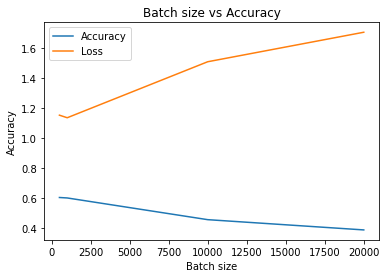

In [29]:
plt.plot(lst_batch_size, acc_lst_batch, label="Accuracy")
plt.plot(lst_batch_size, loss_lst_batch, label="Loss")
plt.legend()
plt.title("Batch size vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Batch size")
plt.show()

Batch size vs Accuracy

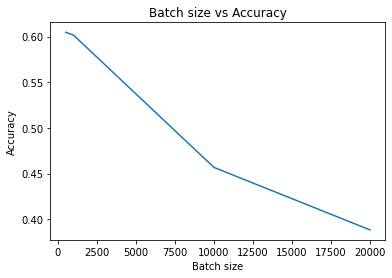

In [30]:
plt.plot(lst_batch_size, acc_lst_batch)
plt.title("Batch size vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Batch size")
plt.show()

Batch Size vs Loss

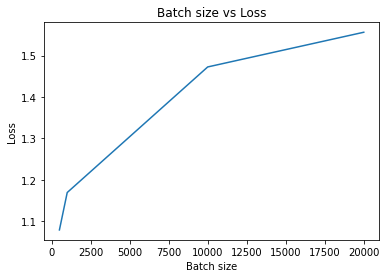

In [ ]:
plt.plot(lst_batch_size, loss_lst_batch)
plt.title("Batch size vs Loss")
plt.ylabel("Loss")
plt.xlabel("Batch size")
plt.show()

**2.2**
As we can see from the above three graphs, the loss increases while accuracy decreases with increase in batch size which is similar to learning rate

**2.3**

In [ ]:
# Choosing lr = 0.005, epoch = 25, batch = 1000
model = tf.keras.models.clone_model(cifar10)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
model.fit(X_Train1, Y_Train1, epochs=25, batch_size=1000)
loss__, acc__ = model.evaluate(X_Test1, Y_Test1)

Epoch 1/25
50/50 [==============================] - 22s 426ms/step - loss: 1.9983 - accuracy: 0.2710
Epoch 2/25
50/50 [==============================] - 22s 443ms/step - loss: 1.5278 - accuracy: 0.4456
Epoch 3/25
50/50 [==============================] - 21s 426ms/step - loss: 1.3848 - accuracy: 0.5022
Epoch 4/25
50/50 [==============================] - 21s 426ms/step - loss: 1.3201 - accuracy: 0.5282
Epoch 5/25
50/50 [==============================] - 21s 428ms/step - loss: 1.2520 - accuracy: 0.5521
Epoch 6/25
50/50 [==============================] - 21s 426ms/step - loss: 1.2169 - accuracy: 0.5656
Epoch 7/25
50/50 [==============================] - 21s 427ms/step - loss: 1.1695 - accuracy: 0.5846
Epoch 8/25
50/50 [==============================] - 21s 427ms/step - loss: 1.1536 - accuracy: 0.5912
Epoch 9/25
50/50 [==============================] - 21s 426ms/step - loss: 1.1145 - accuracy: 0.6041
Epoch 10/25
50/50 [==============================] - 21s 428ms/step - loss: 1.0893 - accura

By Choosing lr = 0.005, epoch = 25, batch = 1000 the training accuracy is 70.75% while test accuracy is 60.28%

In [ ]:
# Choosing lr = 0.005, epoch = 25, batch = 500

model1 = tf.keras.models.clone_model(cifar10)
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
model1.fit(X_Train1, Y_Train1, epochs=25, batch_size=500)
loss, acc = model1.evaluate(X_Test1, Y_Test1)

Epoch 1/25
100/100 [==============================] - 23s 222ms/step - loss: 1.7996 - accuracy: 0.3424
Epoch 2/25
100/100 [==============================] - 22s 223ms/step - loss: 1.4600 - accuracy: 0.4719
Epoch 3/25
100/100 [==============================] - 22s 222ms/step - loss: 1.3478 - accuracy: 0.5157
Epoch 4/25
100/100 [==============================] - 22s 221ms/step - loss: 1.2760 - accuracy: 0.5448
Epoch 5/25
100/100 [==============================] - 23s 230ms/step - loss: 1.2066 - accuracy: 0.5699
Epoch 6/25
100/100 [==============================] - 22s 222ms/step - loss: 1.1601 - accuracy: 0.5842
Epoch 7/25
100/100 [==============================] - 22s 223ms/step - loss: 1.1257 - accuracy: 0.5997
Epoch 8/25
100/100 [==============================] - 22s 222ms/step - loss: 1.0986 - accuracy: 0.6076
Epoch 9/25
100/100 [==============================] - 22s 222ms/step - loss: 1.0835 - accuracy: 0.6140
Epoch 10/25
100/100 [==============================] - 22s 223ms/step - l

By Choosing lr = 0.005, epoch = 25, batch = 500 the training accuracy is 70.75% while test accuracy is 59.06% which is slightly less than the above

In [ ]:
#Choosing lr = 0.005, epoch = 50, batch = 500 increasing epochs to improve accuracy metrics

model2 = tf.keras.models.clone_model(cifar10)
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
model2.fit(X_Train1, Y_Train1, epochs=50, batch_size=500)
loss, acc = model2.evaluate(X_Test1, Y_Test1)

Epoch 1/50
100/100 [==============================] - 19s 188ms/step - loss: 1.8619 - accuracy: 0.3192
Epoch 2/50
100/100 [==============================] - 19s 189ms/step - loss: 1.5055 - accuracy: 0.4525
Epoch 3/50
100/100 [==============================] - 19s 189ms/step - loss: 1.3817 - accuracy: 0.4970
Epoch 4/50
100/100 [==============================] - 19s 189ms/step - loss: 1.2952 - accuracy: 0.5330
Epoch 5/50
100/100 [==============================] - 19s 189ms/step - loss: 1.2330 - accuracy: 0.5591
Epoch 6/50
100/100 [==============================] - 19s 188ms/step - loss: 1.1958 - accuracy: 0.5716
Epoch 7/50
100/100 [==============================] - 20s 197ms/step - loss: 1.1498 - accuracy: 0.5920
Epoch 8/50
100/100 [==============================] - 24s 240ms/step - loss: 1.1094 - accuracy: 0.6056
Epoch 9/50
100/100 [==============================] - 26s 260ms/step - loss: 1.0866 - accuracy: 0.6122
Epoch 10/50
100/100 [==============================] - 21s 214ms/step - l

By Choosing lr = 0.005, epoch = 50, batch = 500 the training accuracy is 74.48% while test accuracy is 57.66% which is less than the previous. The train accuracy is increased while the test decreased.

In [ ]:
# lr = 0.005, epoch = 25, batch = 100 to check with different parameters

model3 = tf.keras.models.clone_model(cifar10)
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
model3.fit(X_Train1, Y_Train1, epochs=25, batch_size=100)
loss, acc = model3.evaluate(X_Test1, Y_Test1)

Epoch 1/25
500/500 [==============================] - 22s 43ms/step - loss: 1.7257 - accuracy: 0.3617
Epoch 2/25
500/500 [==============================] - 22s 43ms/step - loss: 1.4877 - accuracy: 0.4623
Epoch 3/25
500/500 [==============================] - 22s 43ms/step - loss: 1.4005 - accuracy: 0.4955
Epoch 4/25
500/500 [==============================] - 22s 43ms/step - loss: 1.3540 - accuracy: 0.5167
Epoch 5/25
500/500 [==============================] - 21s 43ms/step - loss: 1.3099 - accuracy: 0.5329
Epoch 6/25
500/500 [==============================] - 22s 45ms/step - loss: 1.2772 - accuracy: 0.5432
Epoch 7/25
500/500 [==============================] - 22s 43ms/step - loss: 1.2569 - accuracy: 0.5574
Epoch 8/25
500/500 [==============================] - 22s 43ms/step - loss: 1.2283 - accuracy: 0.5646
Epoch 9/25
500/500 [==============================] - 22s 43ms/step - loss: 1.2095 - accuracy: 0.5740
Epoch 10/25
500/500 [==============================] - 21s 43ms/step - loss: 1.190

By Choosing lr = 0.005, epoch = 25, batch = 100 the training accuracy is 64.51% while test accuracy is 52.66% which is less than the above in previous case

In [ ]:
# lr = 0.005, epoch = 20, batch = 1000 to check with different parameters

model4 = tf.keras.models.clone_model(cifar10)
model4.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
model4.fit(X_Train1, Y_Train1, epochs=20, batch_size=1000)
loss, acc = model4.evaluate(X_Test1, Y_Test1)

Epoch 1/20
50/50 [==============================] - 19s 368ms/step - loss: 1.9177 - accuracy: 0.2920
Epoch 2/20
50/50 [==============================] - 18s 367ms/step - loss: 1.5460 - accuracy: 0.4334
Epoch 3/20
50/50 [==============================] - 18s 366ms/step - loss: 1.4380 - accuracy: 0.4775
Epoch 4/20
50/50 [==============================] - 18s 370ms/step - loss: 1.3729 - accuracy: 0.5028
Epoch 5/20
50/50 [==============================] - 18s 369ms/step - loss: 1.3471 - accuracy: 0.5152
Epoch 6/20
50/50 [==============================] - 18s 368ms/step - loss: 1.2705 - accuracy: 0.5439
Epoch 7/20
50/50 [==============================] - 19s 384ms/step - loss: 1.2261 - accuracy: 0.5624
Epoch 8/20
50/50 [==============================] - 18s 368ms/step - loss: 1.1956 - accuracy: 0.5719
Epoch 9/20
50/50 [==============================] - 18s 368ms/step - loss: 1.1659 - accuracy: 0.5848
Epoch 10/20
50/50 [==============================] - 19s 370ms/step - loss: 1.1375 - accura

By Choosing lr = 0.005, epoch = 25, batch = 100 the training accuracy is 68.11% while test accuracy is 59.59% which is not the best performance.

**2.3 Explanation**
The best hyperparameters are:
learning rate = 0.005,
epoch = 25, 
batch = 1000


**2.4**

In [ ]:
Feed_Forward_model = tf.keras.models.Sequential()

Feed_Forward_model.add(tf.keras.layers.Flatten())
Feed_Forward_model.add(tf.keras.layers.Dense(6, activation='relu'))
Feed_Forward_model.add(tf.keras.layers.Dense(16, activation='relu'))
Feed_Forward_model.add(tf.keras.layers.Dense(120, activation='relu'))
Feed_Forward_model.add(tf.keras.layers.Dense(84, activation='relu')) 
Feed_Forward_model.add(tf.keras.layers.Dense(10, activation='softmax'))
Feed_Forward_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Feed_Forward_model.build(input_shape = (50000, 32, 32, 3))
Feed_Forward_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (50000, 3072)             0         
                                                                 
 dense_5 (Dense)             (50000, 6)                18438     
                                                                 
 dense_6 (Dense)             (50000, 16)               112       
                                                                 
 dense_7 (Dense)             (50000, 120)              2040      
                                                                 
 dense_8 (Dense)             (50000, 84)               10164     
                                                                 
 dense_9 (Dense)             (50000, 10)               850       
                                                                 
Total params: 31,604
Trainable params: 31,604
Non-trai

In [ ]:
Feed_Forward_model.fit(X_Train1, Y_Train1, epochs=25, batch_size= 1000)

Epoch 1/25
50/50 [==============================] - 2s 21ms/step - loss: 2.1914 - accuracy: 0.1711
Epoch 2/25
50/50 [==============================] - 1s 21ms/step - loss: 1.9901 - accuracy: 0.2424
Epoch 3/25
50/50 [==============================] - 1s 30ms/step - loss: 1.9436 - accuracy: 0.2538
Epoch 4/25
50/50 [==============================] - 1s 24ms/step - loss: 1.9319 - accuracy: 0.2585
Epoch 5/25
50/50 [==============================] - 1s 21ms/step - loss: 1.9240 - accuracy: 0.2625
Epoch 6/25
50/50 [==============================] - 1s 21ms/step - loss: 1.9173 - accuracy: 0.2623
Epoch 7/25
50/50 [==============================] - 1s 20ms/step - loss: 1.9120 - accuracy: 0.2645
Epoch 8/25
50/50 [==============================] - 1s 20ms/step - loss: 1.9138 - accuracy: 0.2655
Epoch 9/25
50/50 [==============================] - 1s 21ms/step - loss: 1.9067 - accuracy: 0.2699
Epoch 10/25
50/50 [==============================] - 1s 20ms/step - loss: 1.9055 - accuracy: 0.2684
Epoch 11/

In [ ]:
score_FF = Feed_Forward_model.evaluate(X_Test1, Y_Test1)
print('Test loss:', score_FF[0])
print('Test accuracy:', score_FF[1])

313/313 [==============================] - 0s 1ms/step - loss: 1.8828 - accuracy: 0.2784
Test loss: 1.8828445672988892
Test accuracy: 0.2784000039100647


**2.4 a**
The performance is too low with accuracy just 27.8%

**2.4** **b**
No of parameters is 31604. The parameters are less in this compared to 62,006. Despite this it took too long to train and the performace is alomst half of the other. So it is not worth it.